In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler



In [9]:
import zipfile,os
# local_zip = '/content/drive/MyDrive/lung_dataset/lung_raw.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

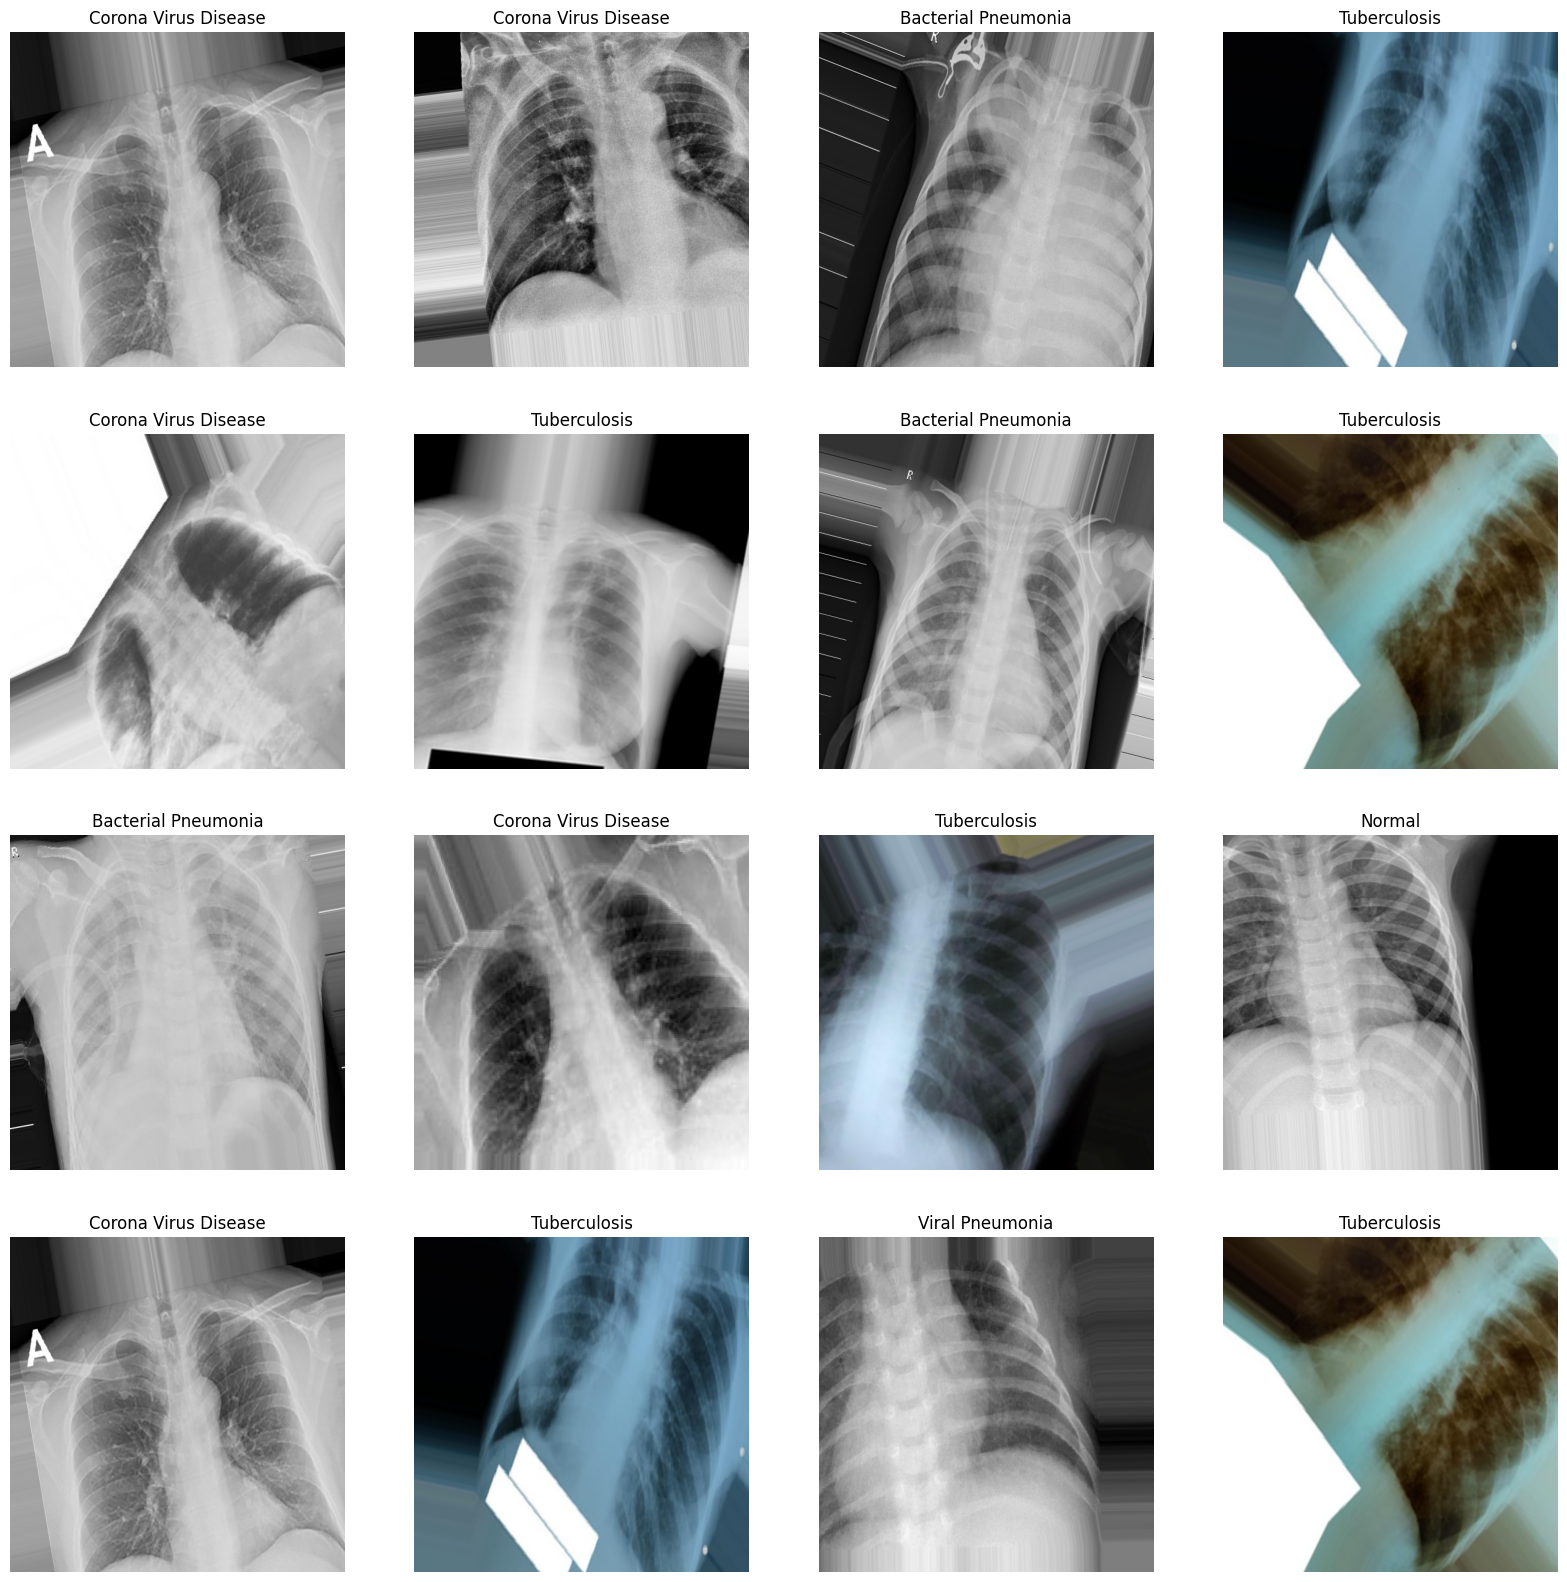

In [9]:
import matplotlib.pyplot as plt
import numpy as np
def Show_Images(target_gen):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())

    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),16))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])
        plt.axis('off')
    plt.show()
Show_Images(train_generator)
# import splitfolders

# splitfolders.ratio('D:\proyek_analisis_data\machine_learning\klasifikasi\lung_raw', output='D:\proyek_analisis_data\machine_learning\klasifikasi\split-folders', seed=1314, ratio=(.8, .2))


In [10]:
base_dir = 'D:\proyek_analisis_data\machine_learning\klasifikasi\split-folders'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [11]:
bacterial_pneu_trains = os.path.join(base_dir, 'Bacterial Pneumonia')
corona_trains = os.path.join(base_dir, 'Corona Virus Disease')
normal_trains = os.path.join(base_dir, 'Normal')
tuberculosis_trains = os.path.join(base_dir, 'Tuberculosis')
viral_pneu_trains = os.path.join(base_dir, 'Viral Pneumonia')


bacterial_pneu_val = os.path.join(base_dir, 'Bacterial Pneumonia')
corona_val = os.path.join(base_dir, 'Corona Virus Disease')
normal_val = os.path.join(base_dir, 'Normal')
tuberculosis_val = os.path.join(base_dir, 'Tuberculosis')
viral_pneu_val = os.path.join(base_dir, 'Viral Pneumonia')


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale= 1./255,
                   rotation_range=45,
                   width_shift_range=0.2 , 
                   height_shift_range=0.2 ,
                   zoom_range=0.2,
                  )



test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [33]:
x = 224

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(x, x),  # mengubah resolusi seluruh gambar menjadi xxx piksel
        
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(x, x), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena ini merupakan masalah klasifikasi lebih dari 2 kelas gunakan class_mode = 'categorical'
        class_mode='categorical')



Found 8074 images belonging to 5 classes.
Found 2021 images belonging to 5 classes.


In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.90 and logs.get('val_accuracy') >= 0.90:
            print("\n Akurasi menyentuh 85%")
            self.model.stop_training = True

callbacks = myCallback()


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2

base_model = tf.keras.applications.DenseNet201(input_shape = (224, 224, 3),
    include_top=False,
    weights="imagenet"
)

#base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(x, x, 3)))

for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(1024, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(512, activation='selu', kernel_regularizer=l2(0.01)),
    Dense(1024, activation='gelu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Kurangi dropout rate
    Dense(5, activation='softmax')
])


In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2

base_model = tf.keras.applications.DenseNet201(input_shape = (224, 224, 3),
    include_top=False,
    weights="imagenet"
)

#base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(x, x, 3)))

for layer in base_model.layers:
    layer.trainable = False

model2 = tf.keras.models.Sequential([
    base_model,
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(1024, (3, 3), activation='selu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(1024, (3, 3), activation='selu', padding='same'),
    GlobalAveragePooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Kurangi dropout rate
    Dense(5, activation='softmax')
])


In [35]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


hist = model2.fit(
      train_generator,
      steps_per_epoch=80,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=500, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10, # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [callbacks],
      verbose=2)

Epoch 1/500
80/80 - 152s - loss: 0.7809 - accuracy: 0.7898 - val_loss: 0.6174 - val_accuracy: 0.8062 - 152s/epoch - 2s/step
Epoch 2/500
80/80 - 138s - loss: 0.6923 - accuracy: 0.8050 - val_loss: 0.9492 - val_accuracy: 0.7125 - 138s/epoch - 2s/step
Epoch 3/500
80/80 - 141s - loss: 0.5969 - accuracy: 0.8164 - val_loss: 0.5229 - val_accuracy: 0.8562 - 141s/epoch - 2s/step
Epoch 4/500
80/80 - 139s - loss: 0.5550 - accuracy: 0.8219 - val_loss: 0.5977 - val_accuracy: 0.7531 - 139s/epoch - 2s/step
Epoch 5/500
80/80 - 139s - loss: 0.5587 - accuracy: 0.8117 - val_loss: 0.5990 - val_accuracy: 0.8156 - 139s/epoch - 2s/step
Epoch 6/500
80/80 - 139s - loss: 0.5335 - accuracy: 0.8199 - val_loss: 0.5833 - val_accuracy: 0.7812 - 139s/epoch - 2s/step
Epoch 7/500
80/80 - 138s - loss: 0.4930 - accuracy: 0.8349 - val_loss: 0.5054 - val_accuracy: 0.8156 - 138s/epoch - 2s/step
Epoch 8/500
80/80 - 141s - loss: 0.4899 - accuracy: 0.8375 - val_loss: 0.5664 - val_accuracy: 0.7969 - 141s/epoch - 2s/step
Epoch 9/

In [64]:
# model.layers[0].trainable = True
# fine_tune_at = -6

# for layer in model.layers[0].layers[:fine_tune_at]:
#     layer.trainable = False

# Compile the model again after fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/20


KeyboardInterrupt: 

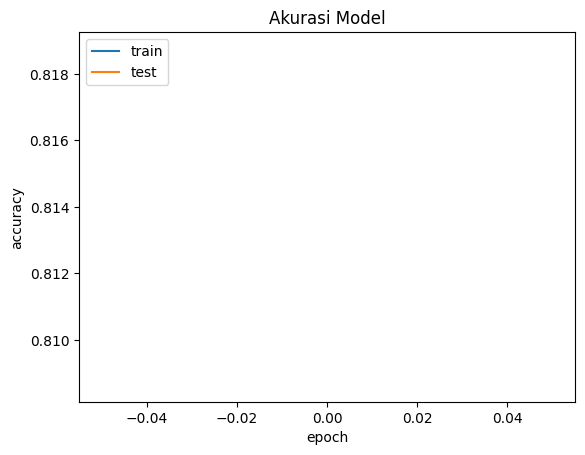

In [37]:
import matplotlib.pyplot as plt
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
def Show_Images_with_Predictions(target_gen, model, class_names):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())
    class_names = list(class_names)  

    predictions = model.predict(batch_images)
    predicted_labels = np.argmax(predictions, axis=1)

    num_images = len(batch_images)
    num_rows = num_images // 4 + (num_images % 4 > 0)  
    plt.figure(figsize=(20, 5 * num_rows))

    for n, i in enumerate(range(num_images)):
        true_label = class_labels[np.argmax(batch_labels[i])]
        predicted_label = class_names[predicted_labels[i]]

        plt.subplot(num_rows, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.show()

class_names = train_generator.class_indices.keys()

Show_Images_with_Predictions(validation_generator, model2, class_names)

NameError: name 'model' is not defined

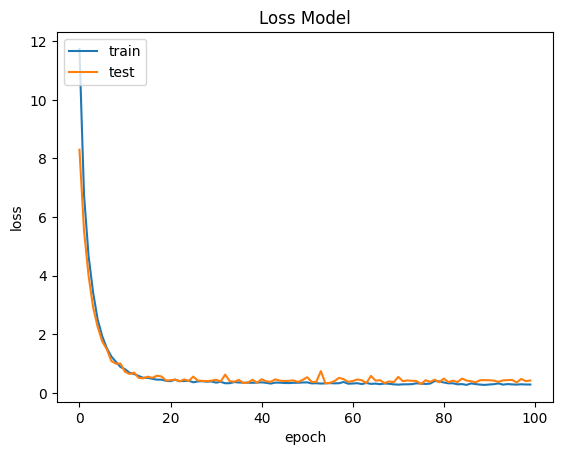

In [24]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
class_names = list(train_generator.class_indices.keys())

for class_name in class_names:
    print(class_name)

NameError: name 'train_generator' is not defined

1/1 [==============================] - 1s 1s/step


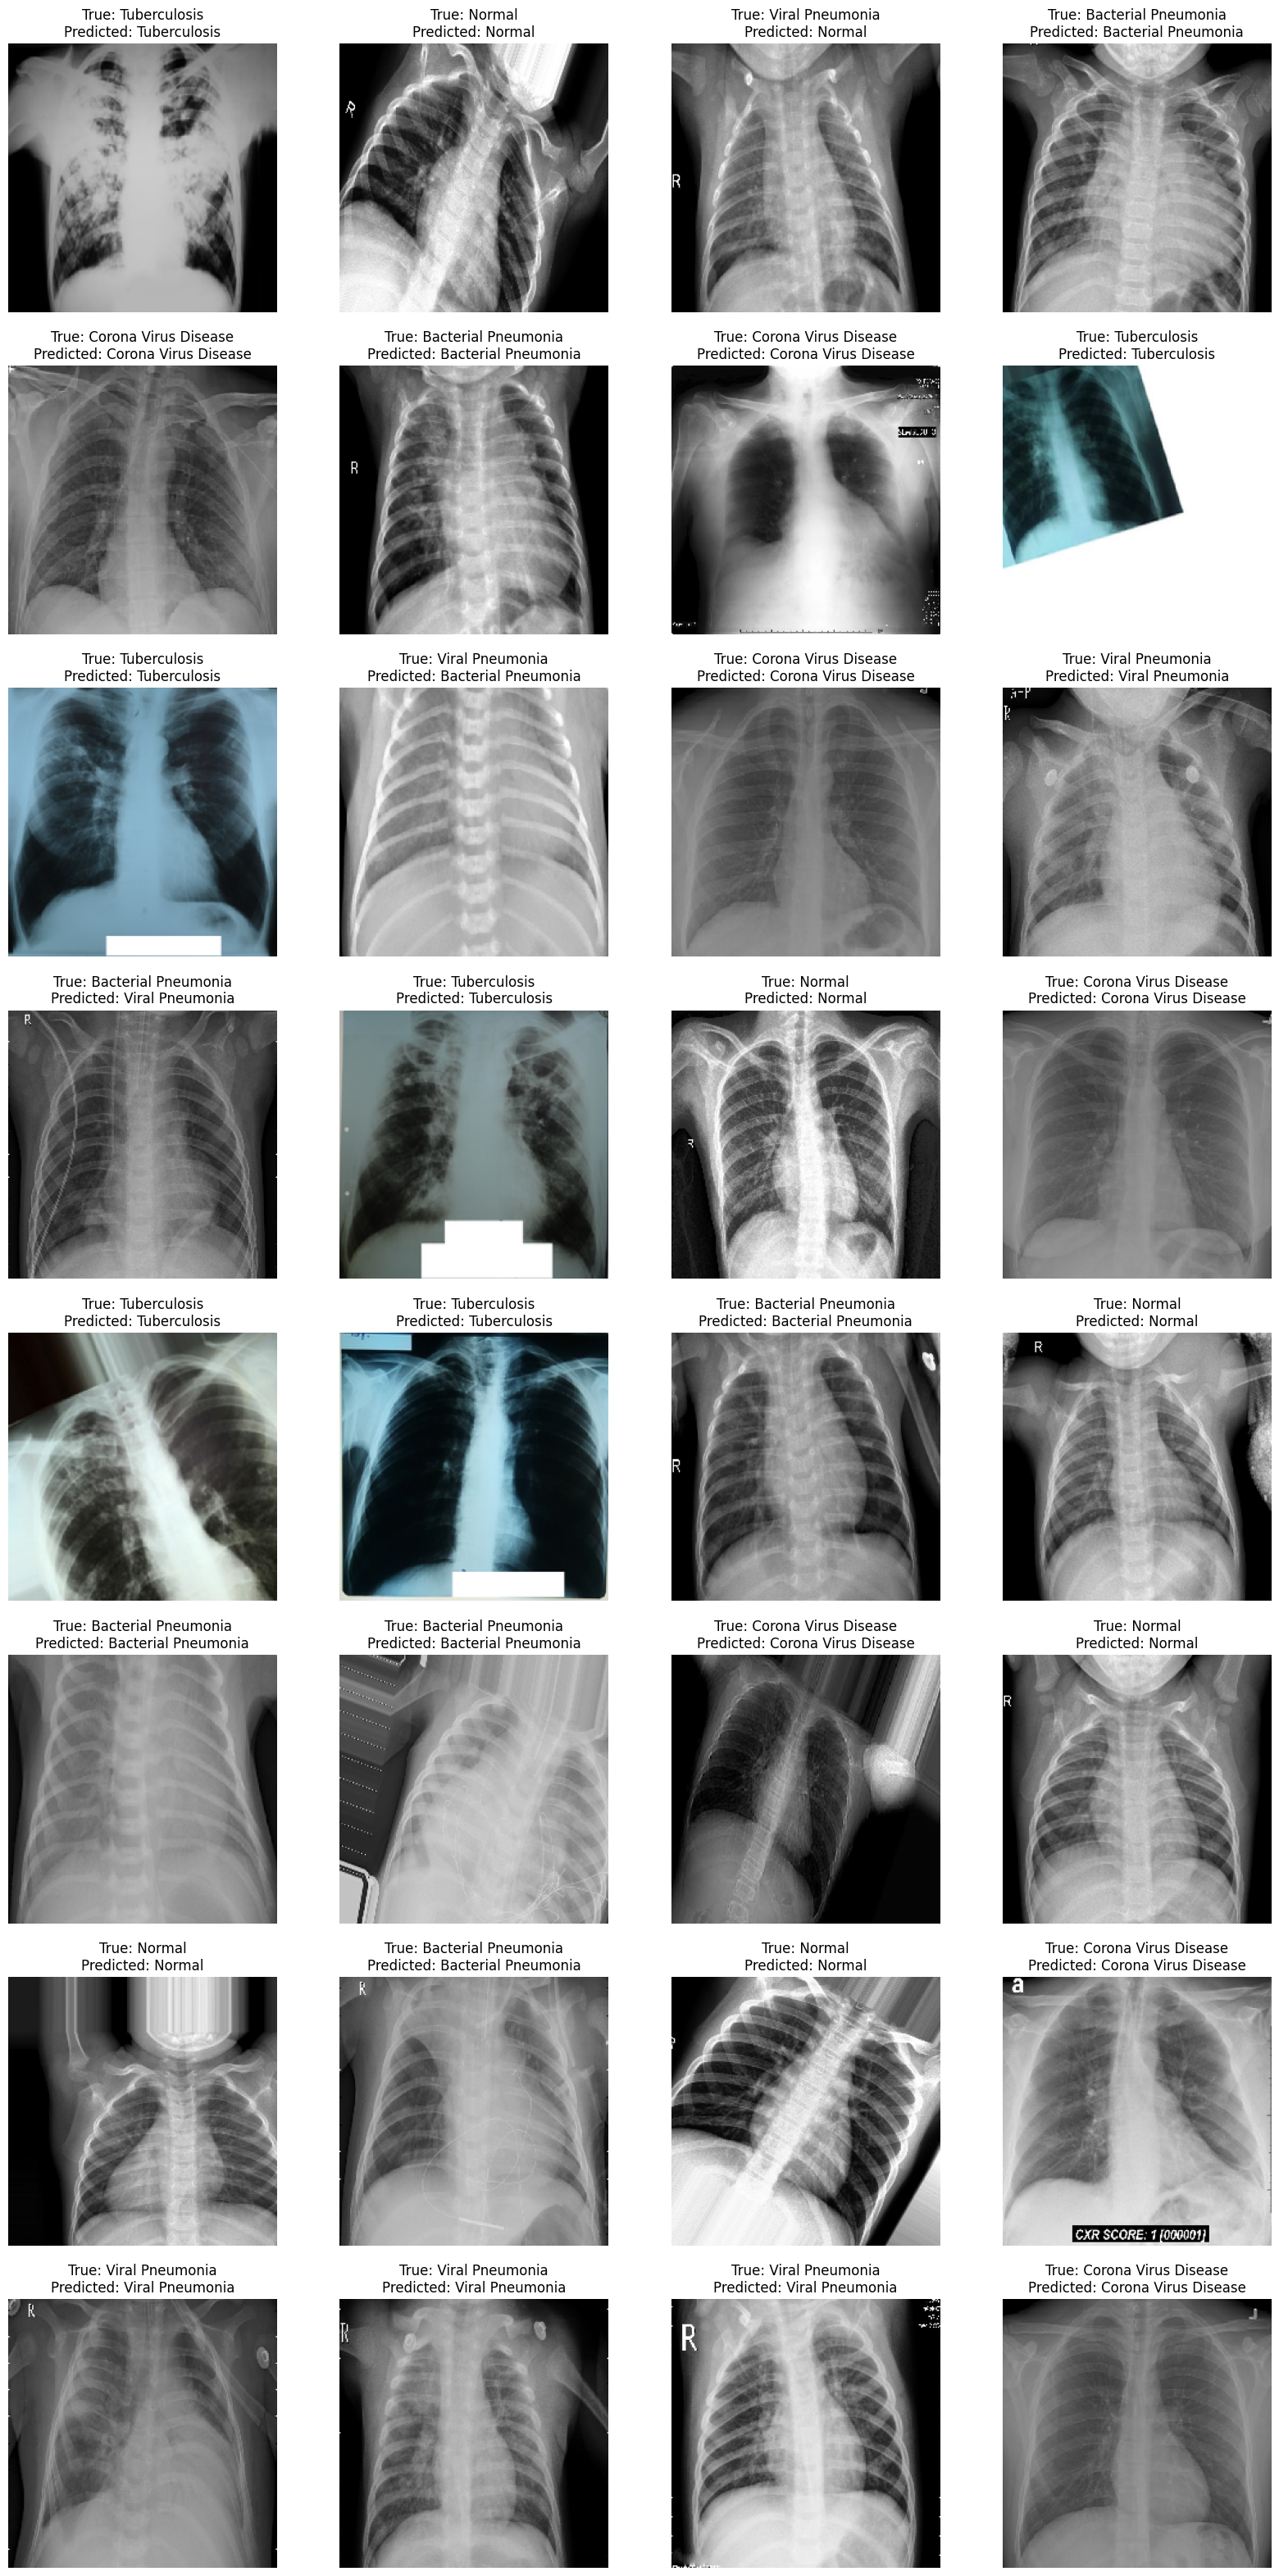

In [39]:
import numpy as np
def Show_Images_with_Predictions(target_gen, model, class_names):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())
    class_names = list(class_names)  

    predictions = model.predict(batch_images)
    predicted_labels = np.argmax(predictions, axis=1)

    num_images = len(batch_images)
    num_rows = num_images // 4 + (num_images % 4 > 0)  
    plt.figure(figsize=(20, 5 * num_rows))

    for n, i in enumerate(range(num_images)):
        true_label = class_labels[np.argmax(batch_labels[i])]
        predicted_label = class_names[predicted_labels[i]]

        plt.subplot(num_rows, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.show()

class_names = train_generator.class_indices.keys()

Show_Images_with_Predictions(validation_generator, model2, class_names)

In [40]:
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model2, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('lungs(90%).tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


169834584